In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# reading data
data=pd.read_csv('country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# Converting imports, exports and health spending percentages to absolute values.
data['exports'] = data['exports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
# describe dataset and Checking percentiles at 25%,50%,75%,90%,95% and 99%
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


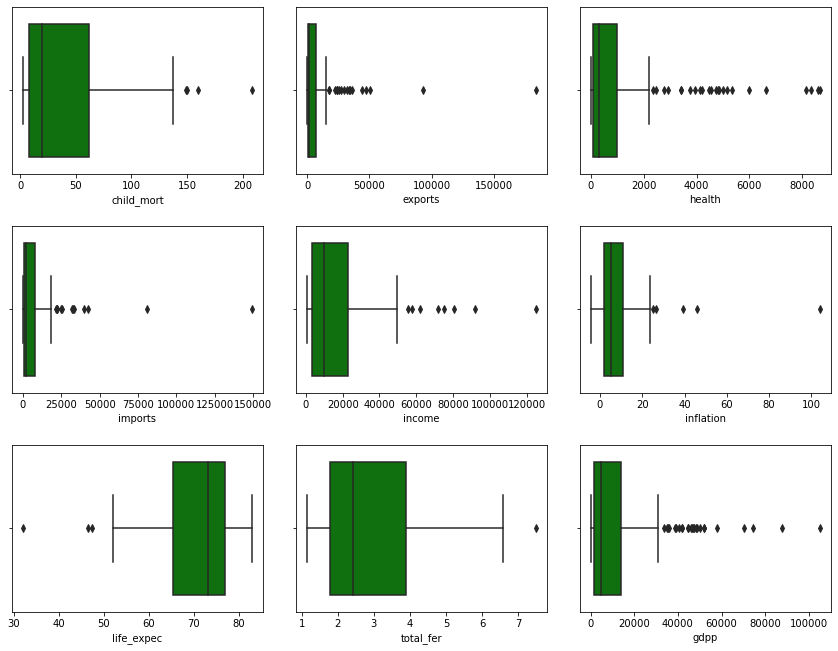

In [10]:
# Univariate Analysis
# Box plot
import warnings
warnings.filterwarnings('ignore')
var =data.select_dtypes(exclude='object').columns
col = 3
row = len(var)/col+1

plt.figure(figsize=(12,12))
for i in enumerate(var):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(data[i[1]],color="green")
    plt.tight_layout(pad =2)
plt.show()

We could observe that outliers present in all the features. These may impact our clustering mode

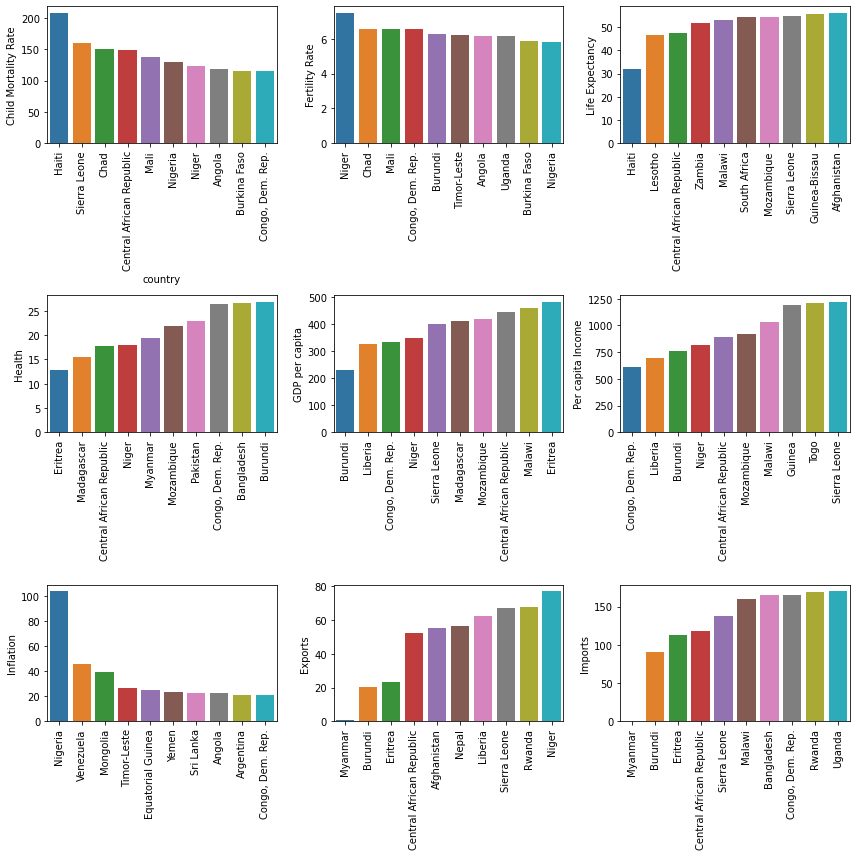

In [11]:
#finding out poor top 10 countries
fig,axs=plt.subplots(3,3,figsize =(12,12))
#Child Mortality Rate
child_mort=data[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
plt1=sns.barplot(x='country',y='child_mort',data=child_mort,ax=axs[0,0])
plt1.set(xlabel='country',ylabel='Child Mortality Rate')
#Exports
exports=data[['country','exports']].sort_values('exports',ascending=True).head(10)
plt2=sns.barplot(x='country',y='exports',data=exports,ax=axs[2,1])
plt2.set(xlabel='',ylabel='Exports')
#Health 
health=data[['country','health']].sort_values('health',ascending=True).head(10)
plt3=sns.barplot(x='country',y='health',data=health,ax=axs[1,0])
plt3.set(xlabel='',ylabel='Health')
#Imports
imports=data[['country','imports']].sort_values('imports',ascending= True).head(10)
plt4=sns.barplot(x='country',y='imports',data=imports,ax=axs[2,2])
plt4.set(xlabel='',ylabel='Imports')
#Per capita Income
income=data[['country','income']].sort_values('income',ascending=True).head(10)
plt5=sns.barplot(x='country',y='income',data=income,ax=axs[1,2])
plt5.set(xlabel='',ylabel='Per capita Income')
#Inflation
inflation=data[['country','inflation']].sort_values('inflation',ascending= False).head(10)
plt6=sns.barplot(x='country',y='inflation',data=inflation,ax=axs[2,0])
plt6.set(xlabel='',ylabel='Inflation')
#Fertility Rate
total_fer=data[['country','total_fer']].sort_values('total_fer',ascending=False).head(10)
plt7=sns.barplot(x='country',y='total_fer',data=total_fer,ax=axs[0,1])
plt7.set(xlabel='',ylabel='Fertility Rate')
#Life Expectancy
life_expec=data[['country','life_expec']].sort_values('life_expec',ascending=True).head(10)
plt8=sns.barplot(x='country',y='life_expec',data=life_expec,ax=axs[0,2])
plt8.set(xlabel = '',ylabel='Life Expectancy')
#The GDP per capita
gdpp=data[['country','gdpp']].sort_values('gdpp',ascending=True).head(10)
plt9=sns.barplot(x='country',y='gdpp',data=gdpp,ax=axs[1,1])
plt9.set(xlabel='',ylabel='GDP per capita')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

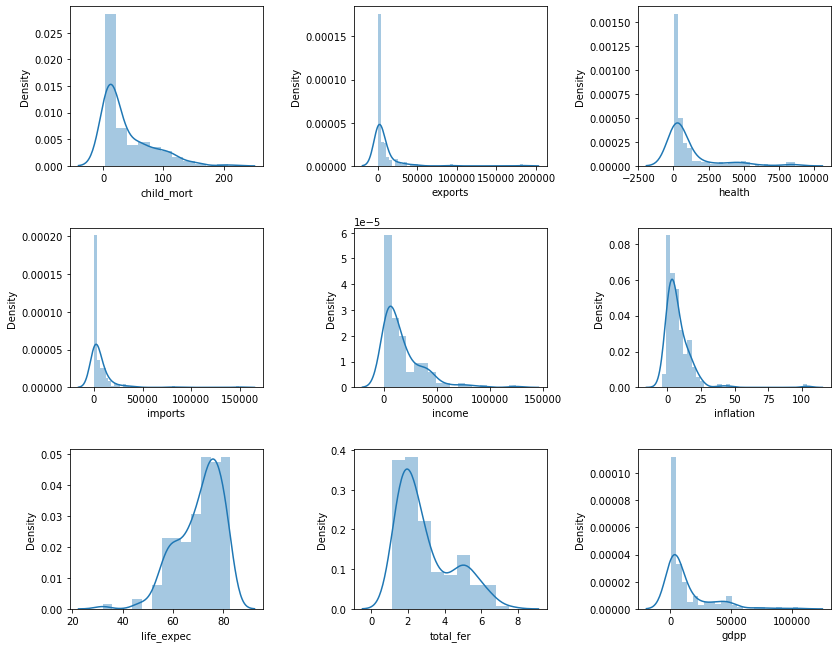

In [12]:
#distrbution plot
var =data.select_dtypes(exclude='object').columns
col = 3
row = len(var)/col+1

plt.figure(figsize=(12,12))
for i in enumerate(var):
    plt.subplot(row,col,i[0]+1)
    sns.distplot(data[i[1]])
    plt.tight_layout(pad = 2)
plt.show()

life_expec are right skewed and all other features are leftskewed

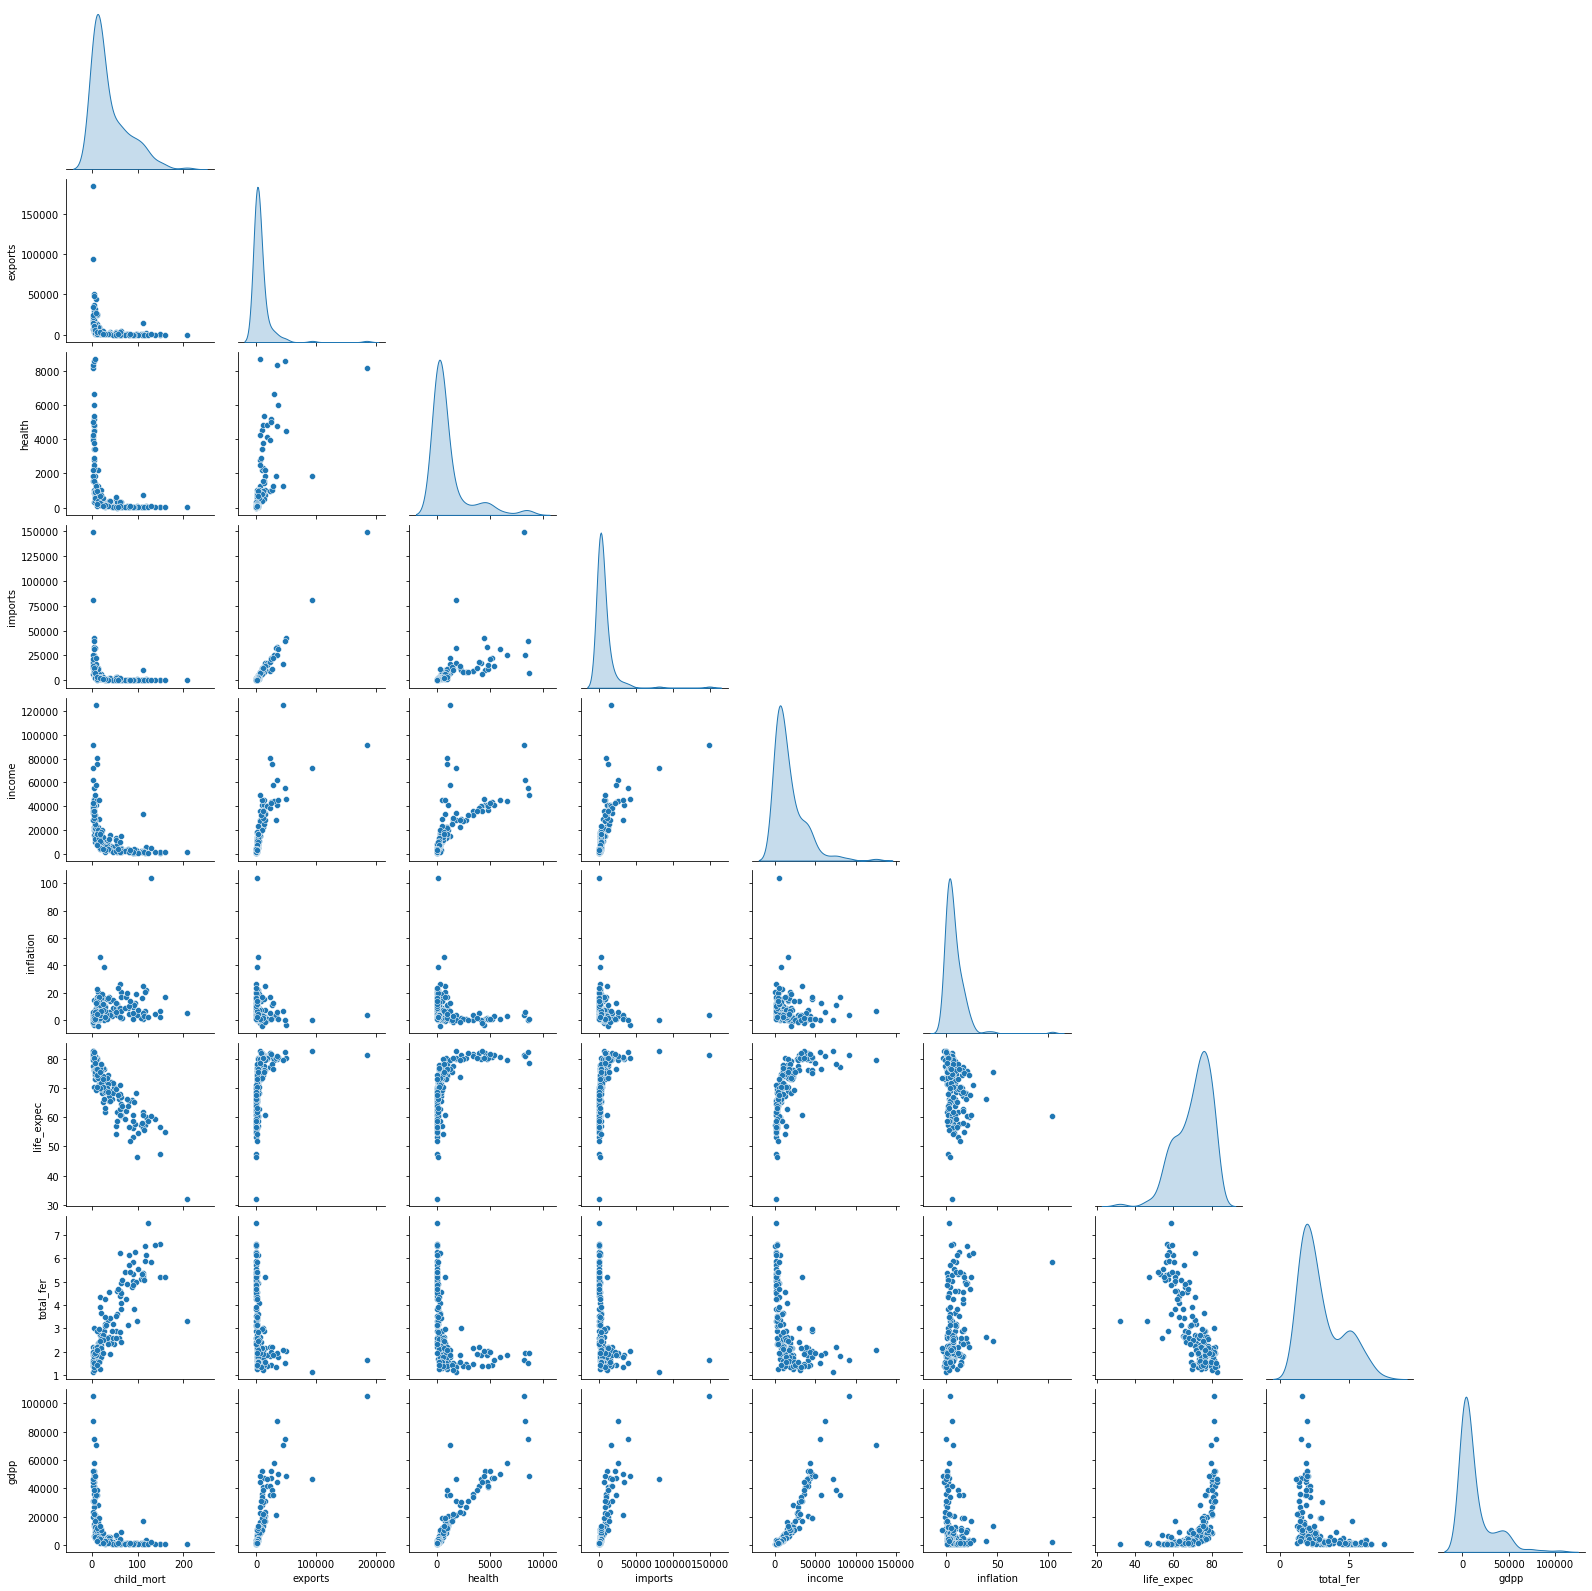

In [13]:
#Bi-variate analysis
# pairplot for continuous data type
sns.pairplot(data.select_dtypes(['int64','float64']),diag_kind='kde',corner=True)
plt.show()

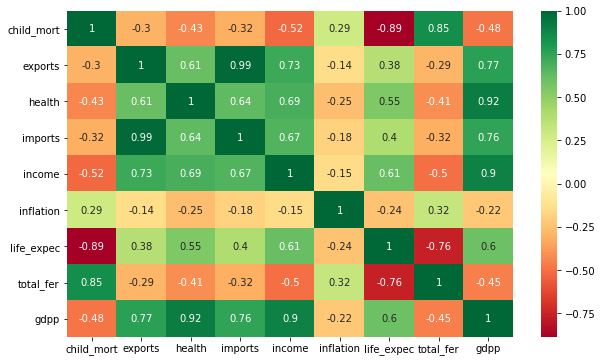

In [14]:
#the correlation between continous varibales using heat map
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

Most of the data point are 'NOT Normally' distributed
From pairplot and heatmap we could observe that there are features with high correlations

In [15]:
#Outlier Treatment
data1=data.drop('country',axis=1)

In [16]:
# list cols for upper caping and get insigts of data
cols = ['exports', 'health', 'imports', 'total_fer','gdpp']
data1[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,1056.733204,6588.352108,2.947964,12964.155689
std,17973.885795,1801.408906,14710.810418,1.513848,18328.704809
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,64794.260000,8410.330400,55371.390000,6.563600,79088.000000
max,183750.000000,8663.600000,149100.000000,7.490000,105000.000000


In [17]:
# upper caping to 0.99 percentilecap = 0.99
for col in cols:
    HL = round(data[col].quantile(cap),2)
    data[col] = data[col].apply(lambda x: HL if x>HL else x)

In [18]:
data[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6538.214776,1054.206617,5873.135222,2.942216,12756.826347
std,11415.308590,1790.845323,9422.700869,1.498235,17430.208938
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,55136.308400,8352.982600,46629.102600,6.553400,76125.920000
max,64794.260000,8410.330000,55371.390000,6.560000,79088.000000


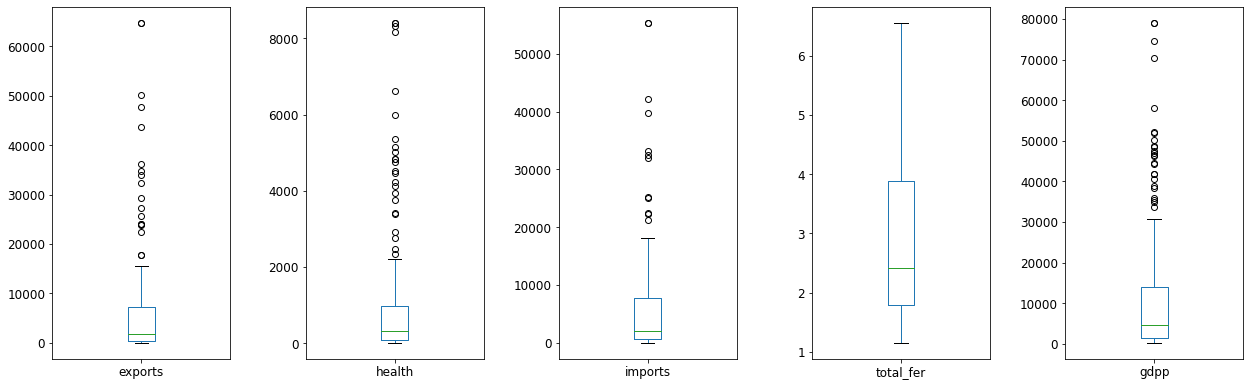

In [19]:
data[cols].plot.box(subplots = True, figsize = (18,6), fontsize = 12)
plt.tight_layout(pad=3)
plt.show()

There are still some outliers exists but, we will choose to keep them

In [20]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data1)
data_scaled

array([[4.26484907e-01, 2.95093321e-04, 3.36341972e-03, ...,
        4.75345168e-01, 7.36593060e-01, 3.07342821e-03],
       [6.81596884e-02, 6.22655666e-03, 2.94856458e-02, ...,
        8.71794872e-01, 7.88643533e-02, 3.68334145e-02],
       [1.20253165e-01, 9.31468360e-03, 2.00167874e-02, ...,
        8.75739645e-01, 2.74447950e-01, 4.03649935e-02],
       ...,
       [1.00778968e-01, 5.12723048e-03, 8.87582515e-03, ...,
        8.08678501e-01, 1.26182965e-01, 1.02988479e-02],
       [2.61441091e-01, 2.13292722e-03, 6.36206303e-03, ...,
        6.98224852e-01, 5.55205047e-01, 1.02988479e-02],
       [3.91918208e-01, 2.93402035e-03, 8.45852168e-03, ...,
        3.92504931e-01, 6.70347003e-01, 1.17305692e-02]])

# Clustering

In [21]:
#K-Mean Cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)                                      

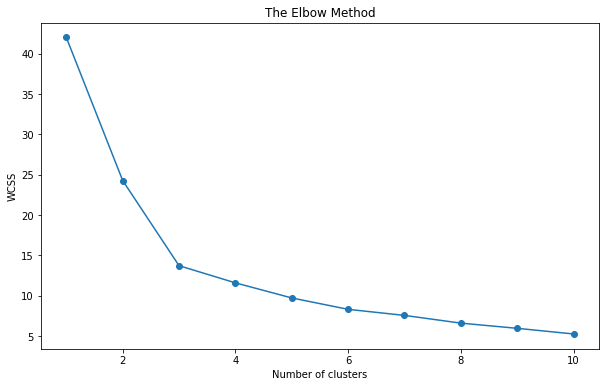

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we would choose 3 clusters as optimal no.

In [23]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data_scaled)
type(data_scaled)
y_kmeans

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [24]:
data['KMean_ClusterID']= pd.Series(kmeans.labels_)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,0


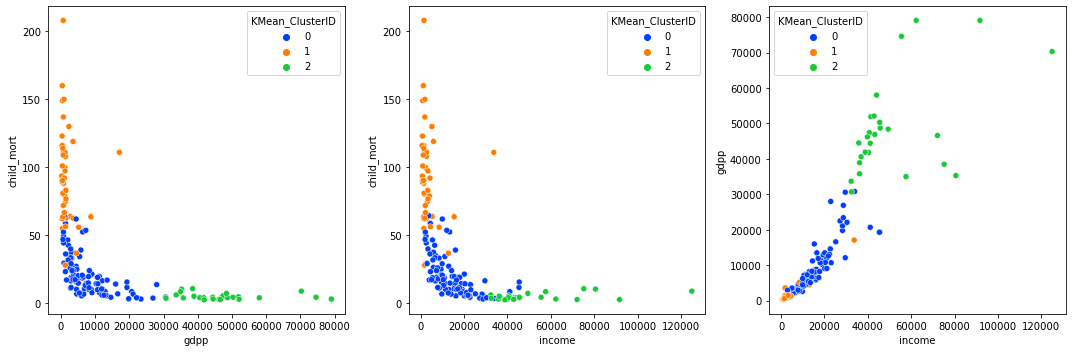

In [25]:
#Visualisation and Cluster Analysis
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x='gdpp',y ='child_mort',data=data,hue='KMean_ClusterID',palette="bright")

plt.subplot(1,3,2)
sns.scatterplot(x='income',y='child_mort',data=data,hue='KMean_ClusterID',palette="bright")

plt.subplot(1,3,3)
sns.scatterplot(x='income',y='gdpp',data=data,hue='KMean_ClusterID',palette="bright")

plt.tight_layout()
plt.show()

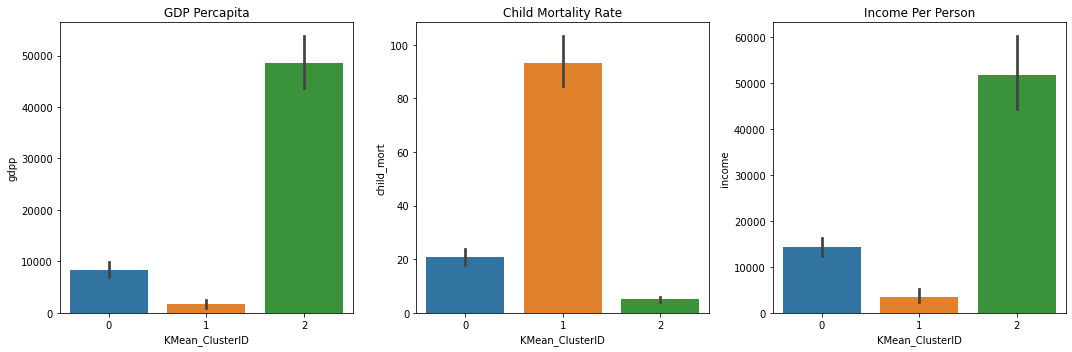

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x='KMean_ClusterID',y ='gdpp',data=data)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x='KMean_ClusterID',y='child_mort',data=data)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x='KMean_ClusterID',y='income',data=data)
plt.title('Income Per Person')

plt.tight_layout()

plt.show()

In th scater plot the clusters are clearly visible
From the bar plot of clusters we could see that,
Cluster 0: Developing
Cluster 1: Undeveloped
Cluster 2: Developed

In [27]:
KMean_cluster_Undeveloped =data[data['KMean_ClusterID']==1]
top5=KMean_cluster_Undeveloped.sort_values(by=['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)


In [28]:
print( 'Top 5 undeveloped countries based on KMean cluster are:' ,top5['country'].values)

Top 5 undeveloped countries based on KMean cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


# Hierarchical Clustering

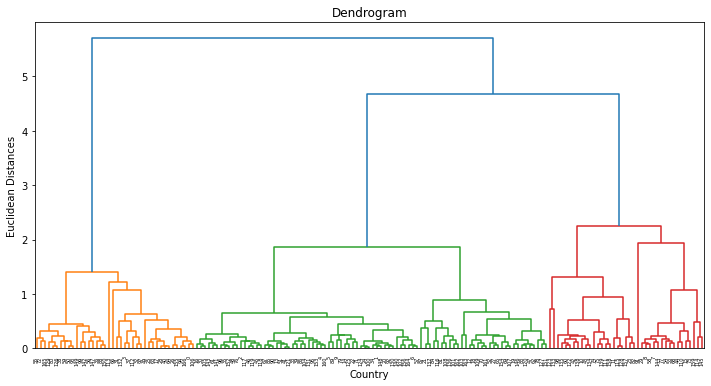

In [29]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,6))
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean Distances')
plt.show()

We could see 3 clusters fom the above dendogram

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data_scaled)

In [31]:
y_hc

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

In [32]:
data['H_ClusterID'] = y_hc

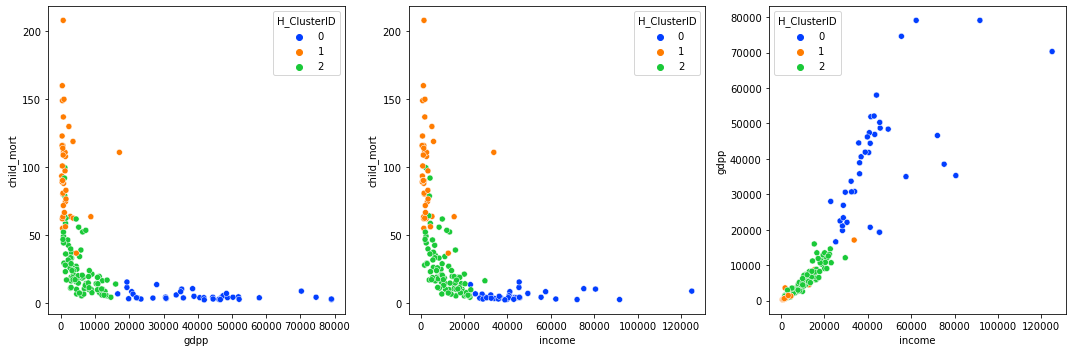

In [33]:
# visualising clusters
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x='gdpp',y='child_mort',data=data,hue='H_ClusterID',palette="bright")

plt.subplot(1,3,2)
sns.scatterplot(x='income',y ='child_mort',data=data,hue='H_ClusterID',palette="bright")

plt.subplot(1,3,3)
cmap=sns.cubehelix_palette(dark=.3,light=.8,as_cmap=True)
sns.scatterplot(x='income',y = 'gdpp',data=data,hue ='H_ClusterID',palette="bright")

plt.tight_layout()
plt.show()

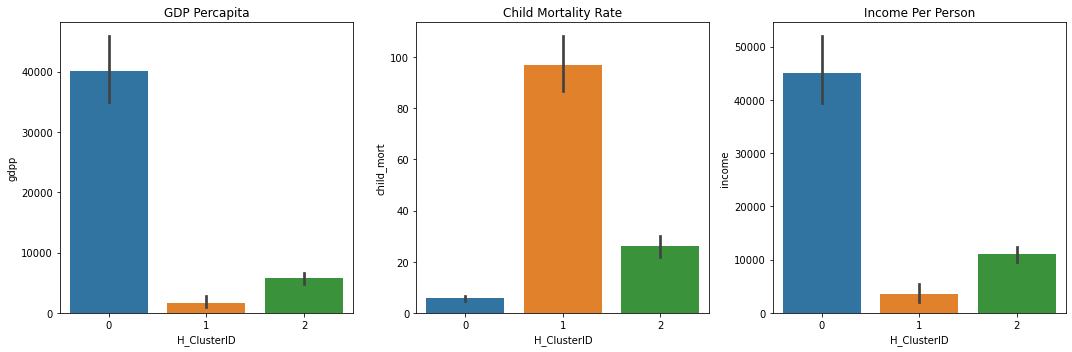

In [34]:
# visualising clusters
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x ='H_ClusterID',y ='gdpp',data=data)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x ='H_ClusterID',y ='child_mort',data=data)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x='H_ClusterID',y='income',data=data)
plt.title('Income Per Person')

plt.tight_layout()

plt.show()



In th scatter plot the clusters are clearly visible
From the bar plot of clusters we could see that,
Cluster 0: Developed
Cluster 1: Undeveloped
Cluster 2: Developing

In [35]:
H_cluster_Undeveloped = data[data['H_ClusterID']== 1]
H_top5 = H_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)

print( 'Top 5 countries dire need of aid  based on H cluster are:' , H_top5['country'].values )

Top 5 countries dire need of aid  based on H cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


# The 5 countries those in direst need of aid
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone